5.[**20 points**] **K-means for compression**

(a)

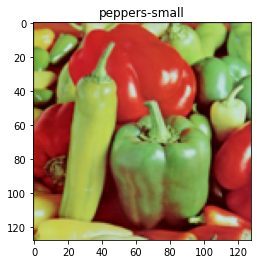

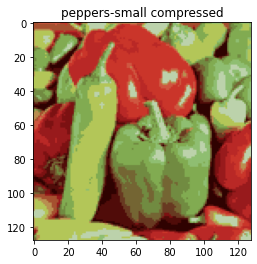

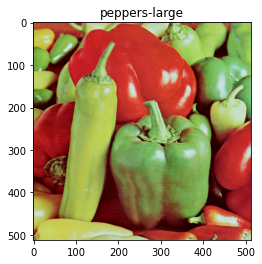

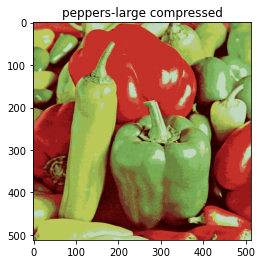

In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import random
import pprint as pp

def compress(A,K,max_iter,image_name):
    """
    A: image matrix
    K: number of means
    max_iter: max iteration times
    """
    # initialize mu
    mu = np.zeros((K,3),dtype=int)
    for i in range(16):
        mu[i] = np.array(A[random.randint(0, A.shape[0]-1),random.randint(0, A.shape[1]-1)])
    
    # initilize centroids
    centroids = np.zeros((A.shape[0],A.shape[1]),dtype=int)
    # update centroids and mu
    for iter in range(max_iter):
        for i in range(A.shape[0]):
            for j in range(A.shape[1]):
                centroids[i,j] = np.argmin(np.linalg.norm(A[i,j]-mu,axis=1))
        for k in range(K):
            if np.sum(centroids==k):
                mu[k] = np.mean(A[centroids==k],axis=0)
    # update image
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            A[i,j] = mu[centroids[i,j]]
    plt.imshow(A)
    plt.title(image_name+" compressed")
    plt.show()

if __name__ == "__main__":
    max_iter = 30
    K = 16

    A = imread('data/peppers-small.tiff')
    plt.imshow(A)
    plt.title("peppers-small")
    plt.show()
    compress(A, K, max_iter, 'peppers-small')

    A = imread('data/peppers-large.tiff')
    plt.imshow(A)
    plt.title("peppers-large")
    plt.show()
    compress(A, K, max_iter, 'peppers-large')

(b) Since we only use 16 colors to represent each pixel, which need 4 bits for computer to store. 
The factor of compression is $\frac{24}{4}=6$.